In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('C:\\Users\\rayal\\Downloads\\sub-division_rainfall_act_dep_1901-2015 (1).xlsx')

In [3]:
#objective 1
df.columns = df.columns.str.strip().str.upper()
df = df[df['PARAMETER'] == 'Actual']  
# Group by state and calculate mean, median, std
stats = df.groupby('SUBDIVISION')['ANNUAL'].agg(['mean', 'median', 'std']).reset_index()
print(stats)
# Identify states with highest and lowest average annual rainfall
highest = stats.loc[stats['mean'].idxmax()]
lowest = stats.loc[stats['mean'].idxmin()]
print("\nState with Highest Avg Rainfall:\n", highest)
print("\nState with Lowest Avg Rainfall:\n", lowest)

                           SUBDIVISION         mean   median          std
0            ANDAMAN & NICOBAR ISLANDS  2927.439423  2956.05   410.070671
1                    ARUNACHAL PRADESH  3418.857143  3354.20  1078.831013
2                    ASSAM & MEGHALAYA  2580.695652  2601.10   310.195411
3                                BIHAR  1197.633913  1207.00   194.643134
4                         CHHATTISGARH  1371.728696  1370.40   210.692112
5               COASTAL ANDHRA PRADESH  1052.904348  1026.50   190.383737
6                    COASTAL KARNATAKA  3408.409649  3360.70   482.644791
7                  EAST MADHYA PRADESH  1205.000000  1197.10   219.501963
8                       EAST RAJASTHAN   655.215652   655.40   166.432887
9                   EAST UTTAR PRADESH   979.213043   988.80   203.635351
10                GANGETIC WEST BENGAL  1490.487826  1482.20   229.490105
11                      GUJARAT REGION   918.230435   904.50   278.415327
12          HARYANA DELHI & CHANDIGARH

In [4]:
#objective 2

# Compare average monthly rainfall between Kerala and Rajasthan
selected_states = df[df['SUBDIVISION'].isin(['Kerala', 'Rajasthan'])]
monthly_avg = selected_states.groupby('SUBDIVISION')[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean()
print("Average Monthly Rainfall:\n", monthly_avg)

# Add Decade column for time-based comparison
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['DECADE'] = (df['YEAR'] // 10) * 10
decade_avg = df.groupby('DECADE')['ANNUAL'].mean().dropna()
print("\nAverage Annual Rainfall by Decade:\n", decade_avg)

# Coefficient of Variation (CV = std / mean)
cv = df.groupby('SUBDIVISION')['ANNUAL'].agg(['mean', 'std'])
cv['CV'] = (cv['std'] / cv['mean']) * 100
print("\nCoefficient of Variation by State:\n", cv[['CV']])

Average Monthly Rainfall:
 Empty DataFrame
Columns: [JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC]
Index: []

Average Annual Rainfall by Decade:
 DECADE
1900    1306.417891
1910    1403.342857
1920    1442.736827
1930    1476.515126
1940    1472.271225
1950    1460.987288
1960    1400.325348
1970    1398.527500
1980    1396.806389
1990    1450.972500
2000    1337.074302
2010    1351.298605
Name: ANNUAL, dtype: float64

Coefficient of Variation by State:
                                            CV
SUBDIVISION                                  
ANDAMAN & NICOBAR ISLANDS           14.007828
ARUNACHAL PRADESH                   31.555311
ASSAM & MEGHALAYA                   12.019837
BIHAR                               16.252307
CHHATTISGARH                        15.359605
COASTAL ANDHRA PRADESH              18.081769
COASTAL KARNATAKA                   14.160410
EAST MADHYA PRADESH                 18.215931
EAST RAJASTHAN                      25.401238
EAST UTTAR PRADESH   

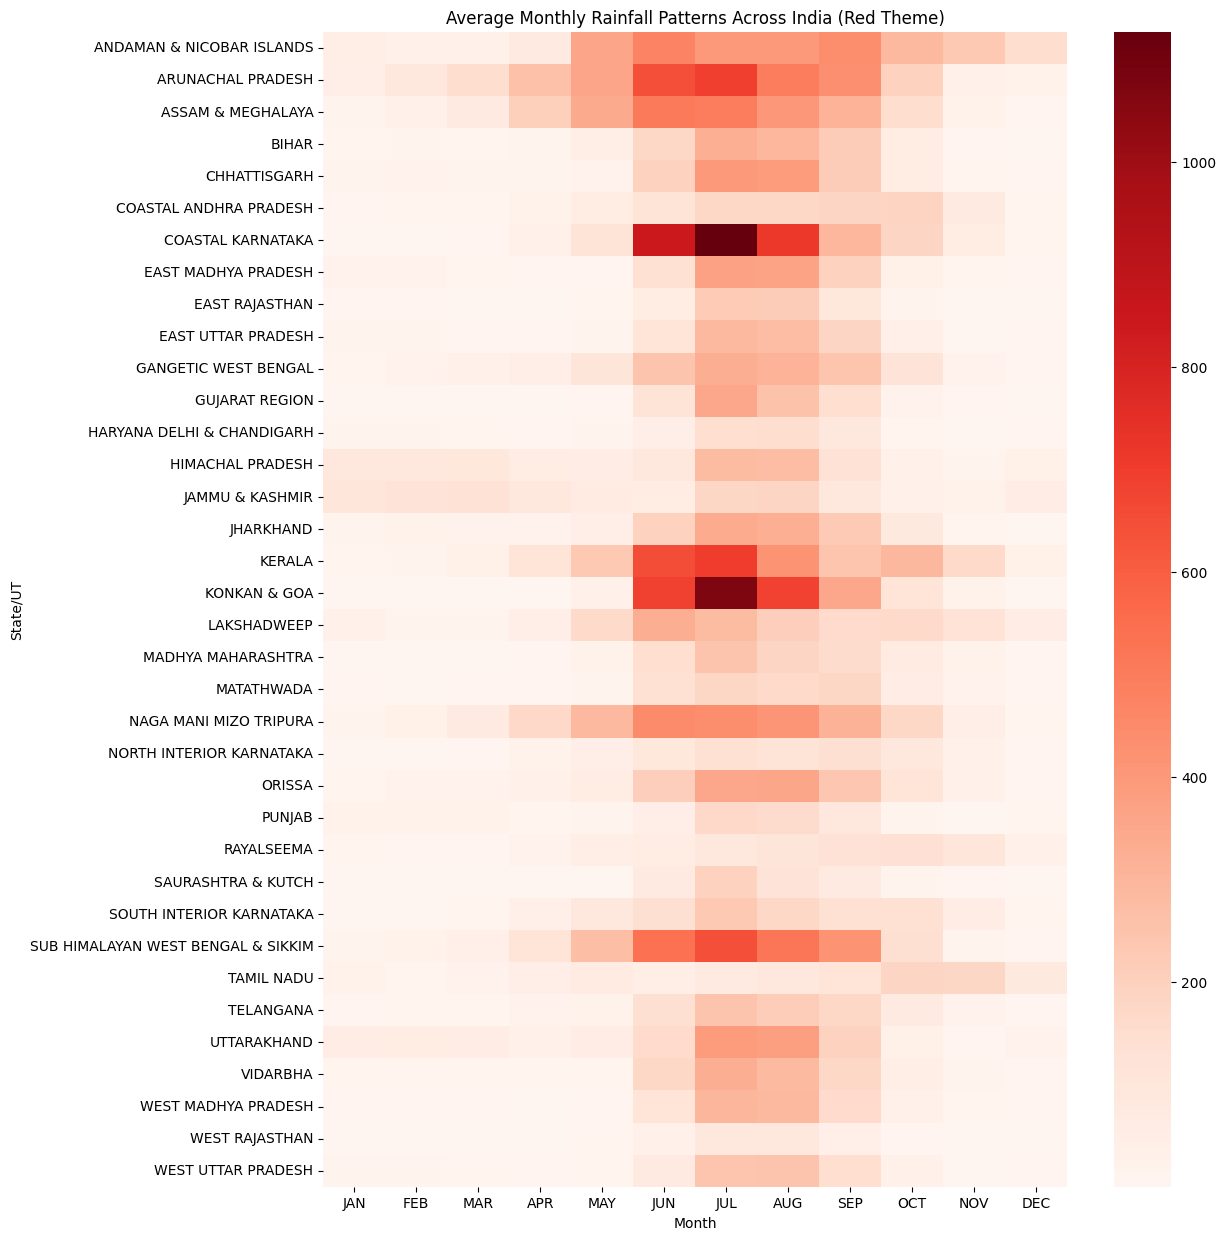

In [5]:
#objevtive 3

# Group by subdivision and calculate average monthly rainfall
monthly_avg = df.groupby('SUBDIVISION')[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean()
# Plot heatmap using red color family
plt.figure(figsize=(12, 15))
sns.heatmap(monthly_avg, cmap='Reds')
plt.title('Average Monthly Rainfall Patterns Across India (Red Theme)')
plt.xlabel('Month'); plt.ylabel('State/UT')
plt.show()

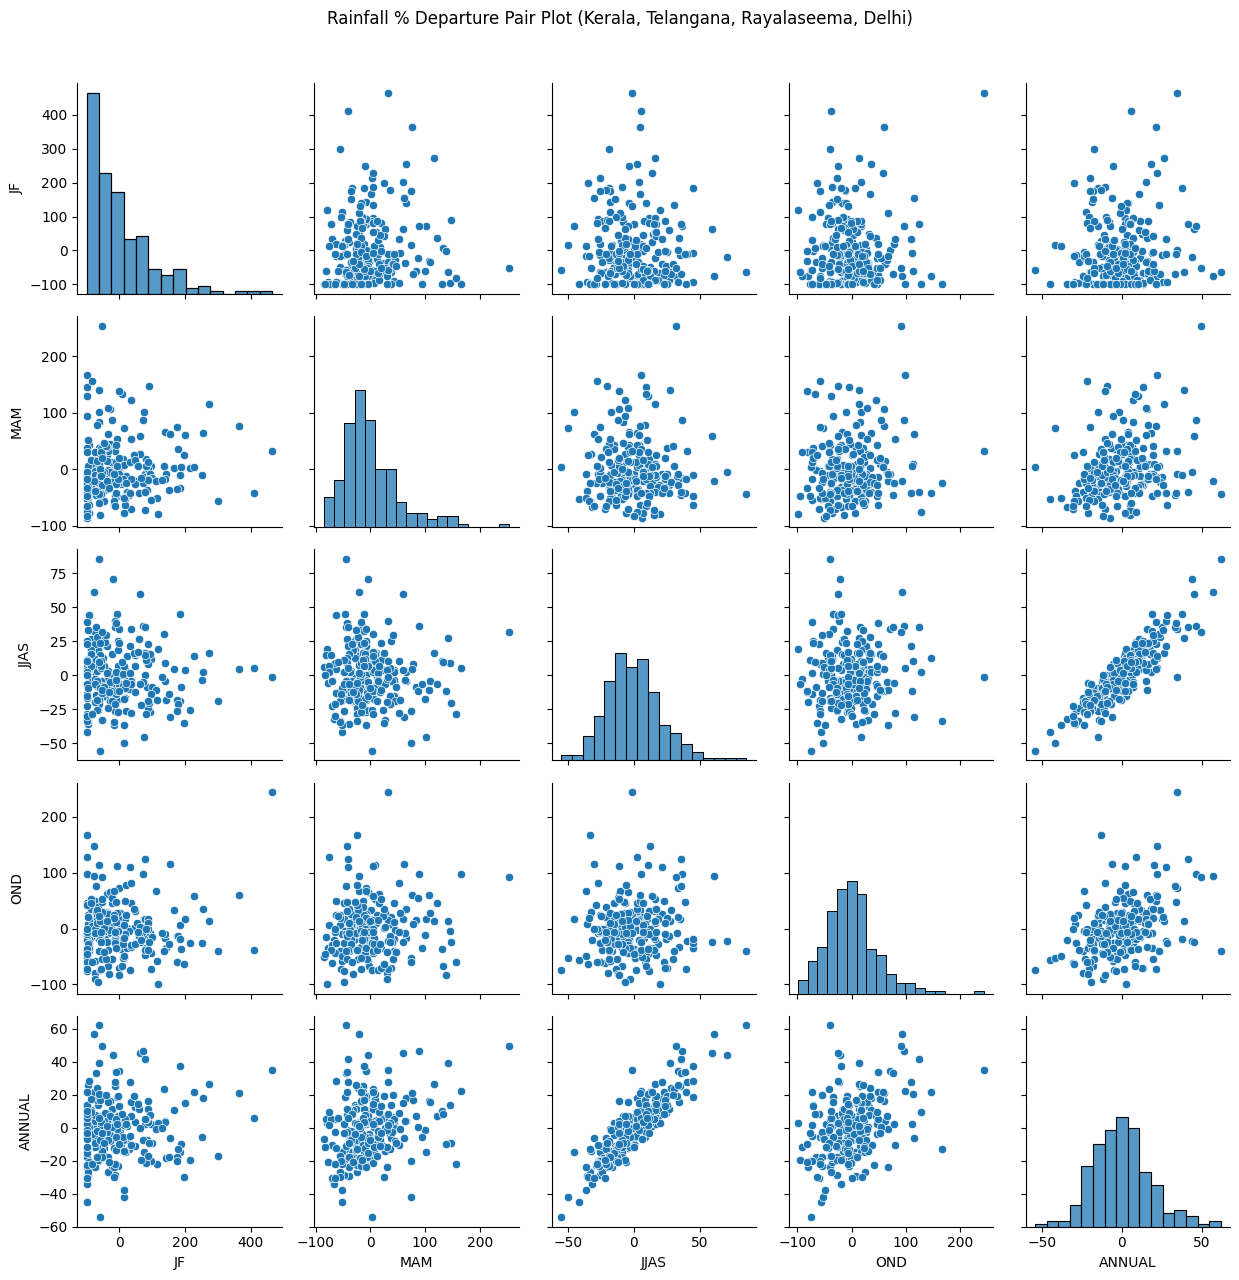

In [13]:
#bjective 4
file_path = r"C:\Users\rayal\Downloads\sub-division_rainfall_act_dep_1901-2015 (1).csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.upper()

df_perc = df[df['PARAMETER'].str.upper() == 'PERCENTAGE DEPARTURE'].copy()

cols_of_interest = ['SUBDIVISION', 'YEAR', 'JF', 'MAM', 'JJAS', 'OND', 'ANNUAL']
df_perc = df_perc[cols_of_interest]


for col in ['JF', 'MAM', 'JJAS', 'OND', 'ANNUAL']:
    df_perc[col] = pd.to_numeric(df_perc[col], errors='coerce')

# Droping rows with missing values
df_perc.dropna(subset=['JF', 'MAM', 'JJAS', 'OND', 'ANNUAL'], inplace=True)

# Filtering for specific subdivisions
target_subdivisions = ['KERALA', 'TELANGANA', 'RAYALASEEMA', 'DELHI']
df_filtered = df_perc[df_perc['SUBDIVISION'].str.upper().isin(target_subdivisions)]

# Ploting the pairplot
sns.pairplot(df_filtered[['JF', 'MAM', 'JJAS', 'OND', 'ANNUAL']])
plt.suptitle("Rainfall % Departure Pair Plot (Kerala, Telangana, Rayalaseema, Delhi)", y=1.02)
plt.tight_layout()
plt.show()



--- Missing Values ---
SUBDIVISION       0
YEAR              0
PARAMETER         0
JAN              28
FEB              21
MAR              23
APR              15
MAY              16
JUN              10
JUL              14
AUG               8
SEP              13
OCT              27
NOV              63
DEC              59
ANNUAL         4168
JF             4132
MAM            4137
JJAS           4136
OND            4145
dtype: int64


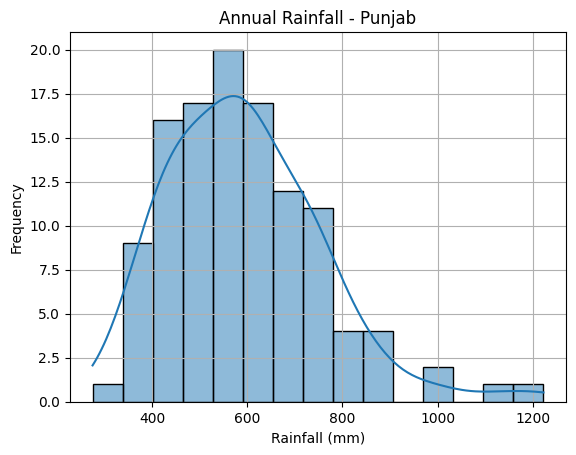

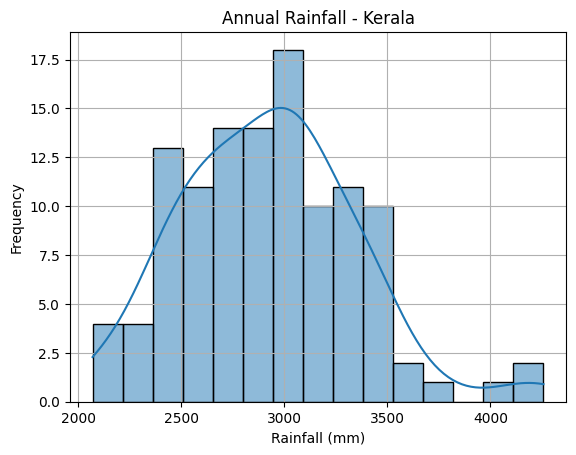

No data found for Rajasthan


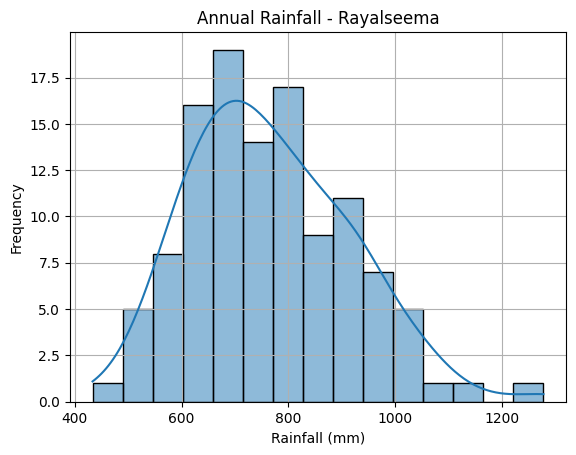

No data found for Maharashtra


In [14]:
#objective 6

print("\n--- Missing Values ---")
print(df.isnull().sum())
df.columns = df.columns.str.strip().str.upper()
df = df[df['PARAMETER'] == 'Actual']
df = df.fillna(df.mean(numeric_only=True))
states = ['Punjab', 'Kerala', 'Rajasthan','Rayalseema', 'Maharashtra']
for state in states:
    data = df[df['SUBDIVISION'].str.upper() == state.upper()]
    if not data.empty:
        sns.histplot(data['ANNUAL'], kde=True, bins=15)
        plt.title(f'Annual Rainfall - {state}')
        plt.xlabel('Rainfall (mm)')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data found for {state}")


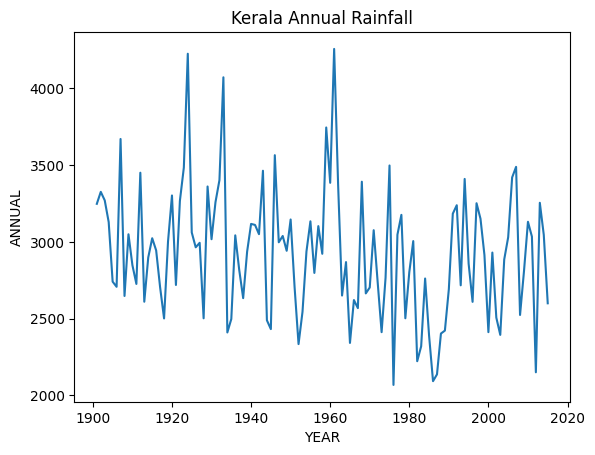

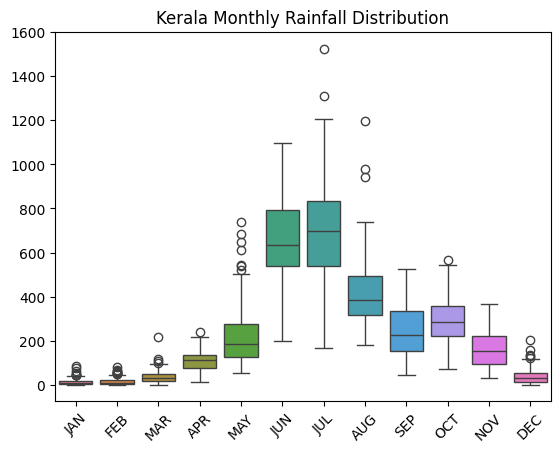

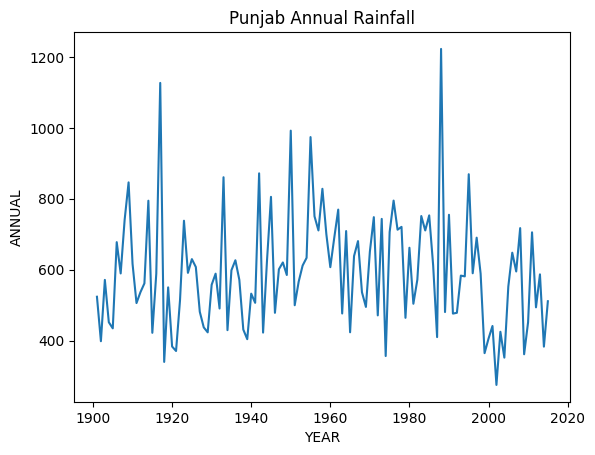

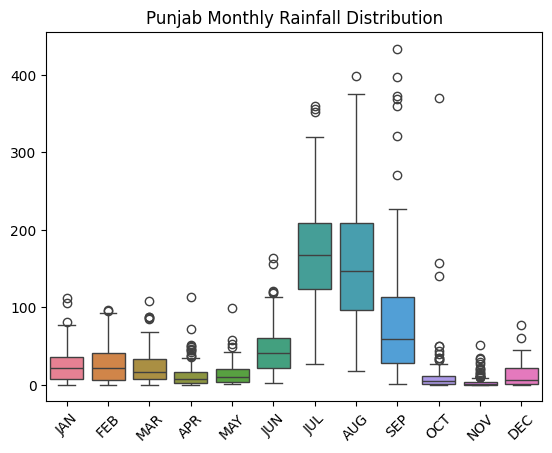

In [15]:
#objective 7

# Filtering only actual rainfall data
df = df[df['PARAMETER'] == 'Actual']
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Converting monthly columns to numeric
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
for m in months:
    df[m] = pd.to_numeric(df[m], errors='coerce')

# Ploting for each selected state
for state in ['Kerala', 'Punjab']:
    d = df[df['SUBDIVISION'].str.upper() == state.upper()]
    
    # Line ploting for annual rainfall
    sns.lineplot(x='YEAR', y='ANNUAL', data=d)
    plt.title(f'{state} Annual Rainfall')
    plt.show()

    # Box ploting for monthly rainfall
    sns.boxplot(data=d[months])
    plt.title(f'{state} Monthly Rainfall Distribution')
    plt.xticks(rotation=45)
    plt.show()


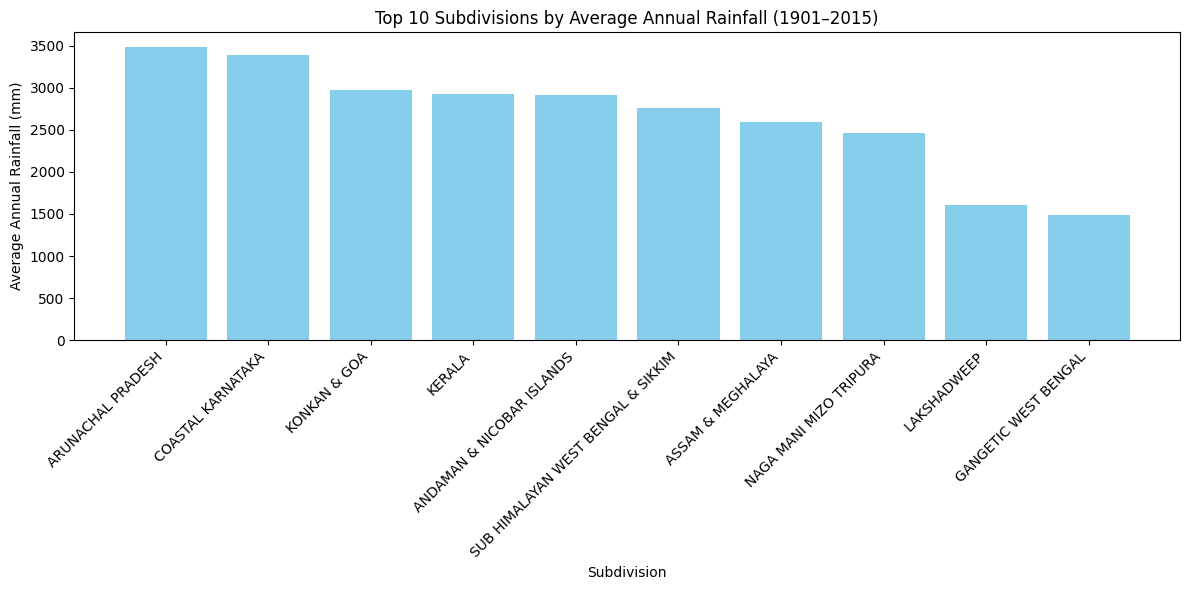

In [17]:
#objective 8

file_path = 'C:\\Users\\rayal\\Downloads\\sub-division_rainfall_act_dep_1901-2015 (1).xlsx'
df = pd.read_excel(file_path, sheet_name='sub-division_rainfall_act_dep_1')
mean_rainfall = df[df['Parameter'] == 'Mean']
top_10_subdivisions = mean_rainfall.sort_values(by='ANNUAL', ascending=False).head(10)
x = range(len(top_10_subdivisions))
subdivision_names = top_10_subdivisions['SUBDIVISION']
rainfall_values = top_10_subdivisions['ANNUAL']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x, rainfall_values, color='skyblue')
plt.title('Top 10 Subdivisions by Average Annual Rainfall (1901–2015)')
plt.xlabel('Subdivision')
plt.ylabel('Average Annual Rainfall (mm)')
plt.xticks(ticks=x, labels=subdivision_names, rotation=45, ha='right')
plt.tight_layout()
plt.show()

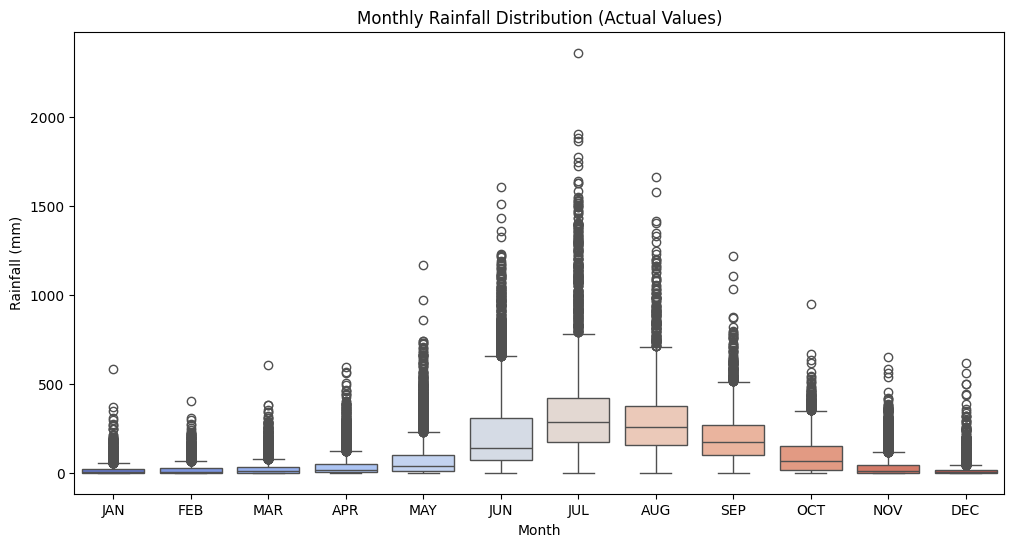

In [19]:
#objective 9

file_path = 'C:\\Users\\rayal\\Downloads\\sub-division_rainfall_act_dep_1901-2015 (1).xlsx'
df = pd.read_excel(file_path, sheet_name='sub-division_rainfall_act_dep_1')
df_actual = df[df['Parameter'] == 'Actual']
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_data = df_actual[months]
df_long = pd.melt(monthly_data, var_name='Month', value_name='Rainfall (mm)')
df_long['Rainfall (mm)'] = pd.to_numeric(df_long['Rainfall (mm)'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Month', y='Rainfall (mm)', hue='Month', palette='coolwarm', legend=False)
plt.title('Monthly Rainfall Distribution (Actual Values)')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Month')
plt.show()

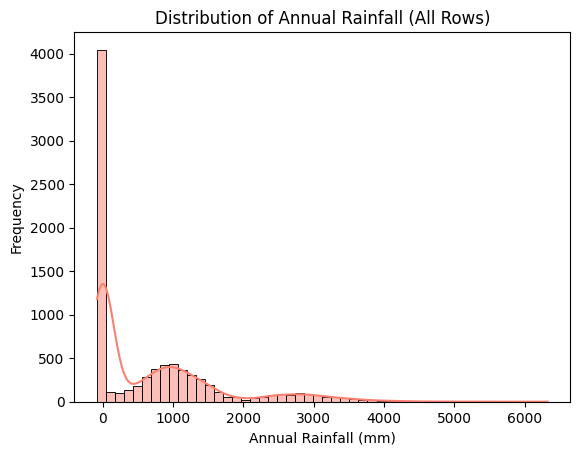

In [20]:
#objective 10

# Load Excel file
file_path = 'C:\\Users\\rayal\\Downloads\\sub-division_rainfall_act_dep_1901-2015 (1).xlsx'
df = pd.read_excel(file_path, sheet_name='sub-division_rainfall_act_dep_1')

# Convert 'ANNUAL' to numeric, forcing errors to NaN, then drop them
df['ANNUAL'] = pd.to_numeric(df['ANNUAL'], errors='coerce')
df_cleaned = df.dropna(subset=['ANNUAL'])

# Plot histogram
sns.histplot(df_cleaned['ANNUAL'], kde=True, bins=50, color='salmon')
plt.title('Distribution of Annual Rainfall (All Rows)')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()